<a href="https://colab.research.google.com/github/aiqicheng/EmotionTeller/blob/main/TwoStepWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
work_dir = "/content/drive/MyDrive/emo/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics
import os
import shutil
import pandas as pd
from pathlib import Path
from IPython.display import Image, display


In [3]:
import shutil
import os
from pathlib import Path

# # Clear __pycache__ directories
# for root, dirs, files in os.walk('.'):
#     if '__pycache__' in dirs:
#         cache_path = Path(root) / '__pycache__'
#         print(f"Removing {cache_path}...")
#         shutil.rmtree(cache_path)

# Clear any other specific cache files or directories if known
# For example, if there were model checkpoints or output directories from previous runs that are no longer needed
# Example: if 'runs' directory from ultralytics often stores temporary data
# if Path('./runs').exists():
#     print("Removing ./runs directory...")
#     shutil.rmtree('./runs')
if Path('drive/MyDrive/Colab Notebooks/EmotionBaseline_pyscripts/__pycache__').exists():
  shutil.rmtree('drive/MyDrive/Colab Notebooks/EmotionBaseline_pyscripts/__pycache__')
if Path('drive/MyDrive/emo/BaselineModels/__pycache__').exists():
  shutil.rmtree('drive/MyDrive/emo/BaselineModels/__pycache__')

print("Cache cleared successfully.")

Cache cleared successfully.


In [4]:
# Clear Colab's output cache
from IPython.display import clear_output
clear_output()

In [5]:
!cd /content/drive/MyDrive/emo/BaselineModels/

In [6]:
import sys
import os

# Add the directory containing two_step_pipeline.py to the system path
pipeline_dir = '/content/drive/MyDrive/emo/BaselineModels/'
if pipeline_dir not in sys.path:
    sys.path.append(pipeline_dir)
all_images_dir = Path(work_dir + "ImageData")     # folder containing all images
test_csv = Path(work_dir + "test_meta.csv")   # CSV containing filenames
target_dir = Path(work_dir + "TestData")          # where to copy them

# --- LOAD METADATA ---
df = pd.read_csv(test_csv)

import two_step_pipeline

In [13]:
target_pred_dir = Path(work_dir + "TestData_pred")
two_step_pipeline.run_on_folder(in_dir=target_dir,out_csv=str(target_dir/"target_dir_pred.csv"))


Loading classifier checkpoint from /content/drive/MyDrive/emo/BaselineModels/runs/classification_resnet18/foldsingle/best.pt ...
Classifier ready. arch=resnet18, num_classes=7, classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


'/content/drive/MyDrive/emo/TestData/target_dir_pred.csv'

In [20]:
import evaluation_pipeline_map

evaluation_pipeline_map.evaluate(gt_csv=test_csv, pred_csv='/content/drive/MyDrive/emo/TestData/target_dir_pred.csv', iou_thr=0.5)

(0.008643492410230932,
 {'Angry': {'AP': 0.0,
   'precision': 0.0,
   'recall': 0.0,
   'npos': 13,
   'n_pred': 119},
  'Disgust': {'AP': 0.0,
   'precision': 0.0,
   'recall': 0.0,
   'npos': 5,
   'n_pred': 9},
  'Fear': {'AP': 0.0,
   'precision': 0.0,
   'recall': 0.0,
   'npos': 8,
   'n_pred': 83},
  'Happy': {'AP': 0.03333403068180379,
   'precision': 0.08294930875576037,
   'recall': 0.20224719101123595,
   'npos': 89,
   'n_pred': 217},
  'Neutral': {'AP': 0.025834714854111394,
   'precision': 0.036585365853658534,
   'recall': 0.125,
   'npos': 120,
   'n_pred': 410},
  'Sad': {'AP': 0.0,
   'precision': 0.0,
   'recall': 0.0,
   'npos': 9,
   'n_pred': 114},
  'Surprise': {'AP': 0.0013357013357013356,
   'precision': 0.008583690987124463,
   'recall': 0.1111111111111111,
   'npos': 18,
   'n_pred': 233}})

In [17]:
test_pd=pd.read_csv(test_csv)
test_pd['file_name']

,file_name
0,9vpkzp9mlx7d9ws9g8.jpg
1,COCO_train2014_000000230044.jpg
2,COCO_train2014_000000233116.jpg
3,COCO_train2014_000000277857.jpg
4,bsd61p964l7rpolyp5.jpg
5,cra80zwyyunnl2d281.jpg
6,dcjqh15lunvxk3jur0.jpg
7,frame_icq4xlf8hyzb52wn.jpg
8,frame_k5ypqlbgeea7jews.jpg
9,ft7cx0rkhwxj2tycj0.jpg


Saved annotated image to: /content/drive/MyDrive/emo/TestData/38ba0ba19a7d4a1eb2a22fb76294b113_gt_annotated.jpg


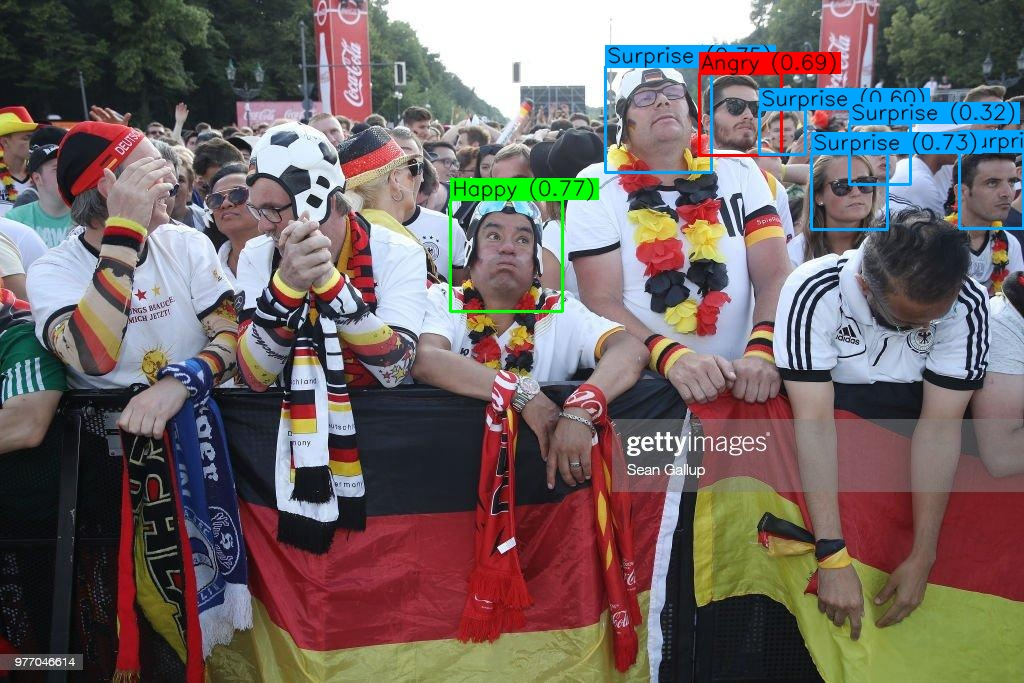

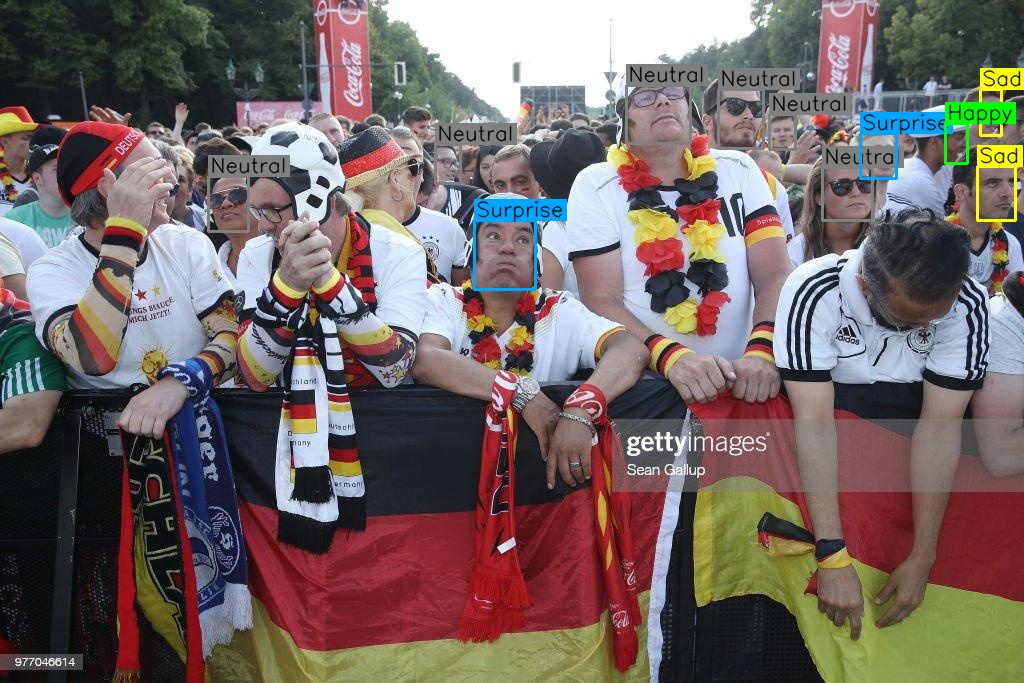

In [18]:
from IPython.display import Image, display

image = "38ba0ba19a7d4a1eb2a22fb76294b113"
evaluation_pipeline_map.draw_ground_truth(gt_csv=test_csv, image_dir=str(target_dir), image_filename=image+".jpg", font_scale = 1.0, font_thickness = 2, bbox_thickness = 4)

# Correctly construct the image paths using pathlib's / operator
gt_image_path = target_dir / (image + "_gt_annotated.jpg")
annotated_image_path = target_dir / (image + "_annotated.jpg")

# Display the images
try:
    display(Image(filename=annotated_image_path))
except FileNotFoundError:
    print(f"Error: The file was not found at {annotated_image_path}")
except Exception as e:
    print(f"An error occurred while trying to display the image: {e}")

try:
    display(Image(filename=gt_image_path))
except FileNotFoundError:
    print(f"Error: The file was not found at {gt_image_path}")
except Exception as e:
    print(f"An error occurred while trying to display the image: {e}")